In [1]:
# find best linear model for time series
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
import pandas as pd
df_train = pd.read_csv('TRAINING_DATA.txt')
df_test = pd.read_csv('TESTING_DATA.txt')

In [3]:
df_train.head()
df_test.head()

,car.count,wind.velocity,wind.direction,time.of.day,day.index,temperature.1,temperature.30
0,129.999421,3.0,217,2,177,2.1,2.7
1,2447.004739,5.7,81,18,122,-4.6,-4.8
2,1185.002307,4.9,229,11,126,4.9,4.8
3,3636.001981,3.4,186,16,148,2.4,2.8
4,958.998969,6.9,50,10,90,-6.8,-6.9


In [4]:
#transform
def transform_df(X):
    # Return an array with the same number of rows as X and one
    # column for each in self.col_names
    #transform wind direction
    Y=X[['car.count','wind.velocity']]
    Y['sin(wd)']=(X['wind.direction']/360.0*2*np.pi).apply(np.sin)
    Y['cos(wd)']=(X['wind.direction']/360.0*2*np.pi).apply(np.cos)
    #transform time of day
    Y['sin(tod)']=(X['time.of.day']/24.0*2*np.pi).apply(np.sin)
    Y['cos(tod)']=(X['time.of.day']/24.0*2*np.pi).apply(np.cos)
    #transform day to month
    Y['sin(di)']=(X['day.index']/365.0*2*np.pi).apply(np.sin)
    Y['cos(di)']=(X['day.index']/365.0*2*np.pi).apply(np.cos)
    Y['temperature.1']=X['temperature.1']
    Y['temperature.30']=X['temperature.30']
    return  Y

In [5]:
#make the transformations
X_train=transform_df(df_train)
X_test=transform_df(df_test)
y_train=df_train['so2']
#X_train_arr=X_train.values.tolist()
#y_train_arr=y_train.values.tolist()
#X_test_arr=X_test.values.tolist()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [6]:
#transformed
X_train.head(5)

,car.count,wind.velocity,sin(wd),cos(wd),sin(tod),cos(tod),sin(di),cos(di),temperature.1,temperature.30
0,1430.000396,1.3,0.913545,-0.406737,-0.707107,7.071068e-01,0.758306,0.651899,-1.7,-0.3
1,2328.990055,2.5,0.992546,0.121869,-0.866025,5.000000e-01,0.993257,-0.115935,-5.4,-4.0
2,2884.999484,2.2,0.694658,0.719340,-1.000000,-1.836970e-16,-0.111659,-0.993747,9.8,9.8
3,3542.011269,5.9,-0.559193,-0.829038,-0.866025,-5.000000e-01,0.958718,-0.284359,4.2,4.5
4,2531.000606,0.5,-0.898794,0.438371,-0.707107,-7.071068e-01,-0.025818,-0.999667,8.9,8.3


In [7]:
# fit a linier model
import numpy as np
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
so2_linear_est=Pipeline([
    ('scl', StandardScaler()),
    ('gbr', linear_model.Lars(verbose=1)),
])
so2_linear_est.fit(X_train,y_train)
so2_linear_est.score(X_train,y_train)

0.48237256348060087

In [8]:
#out of sample scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.2, random_state=42,shuffle=True)
mean_score=0

so2_linear_est.fit(X_train1, y_train1)
so2_linear_est.score(X_train1, y_train1)

0.46544217351475964

In [9]:
so2_linear_est.named_steps['gbr'].coef_

array([  7.52226245, -10.51050141,   6.63845611,  -7.68988353,
        -1.04307894, -15.62528495,  -2.8262526 ,   2.13008598,
       -93.98222405,  88.08755374])

In [12]:
df_test['SO2']=df_train['so2']
df_test['SO2_predicted']=so2_linear_est.predict(X_test)

In [13]:
df_test.head()

,car.count,wind.velocity,wind.direction,time.of.day,day.index,temperature.1,temperature.30,SO2,SO2_predicted
0,129.999421,3.0,217,2,177,2.1,2.7,169.099957,29.969873
1,2447.004739,5.7,81,18,122,-4.6,-4.8,51.000223,36.525572
2,1185.002307,4.9,229,11,126,4.9,4.8,20.299982,46.542285
3,3636.001981,3.4,186,16,148,2.4,2.8,68.799742,83.452687
4,958.998969,6.9,50,10,90,-6.8,-6.9,82.000062,31.069256


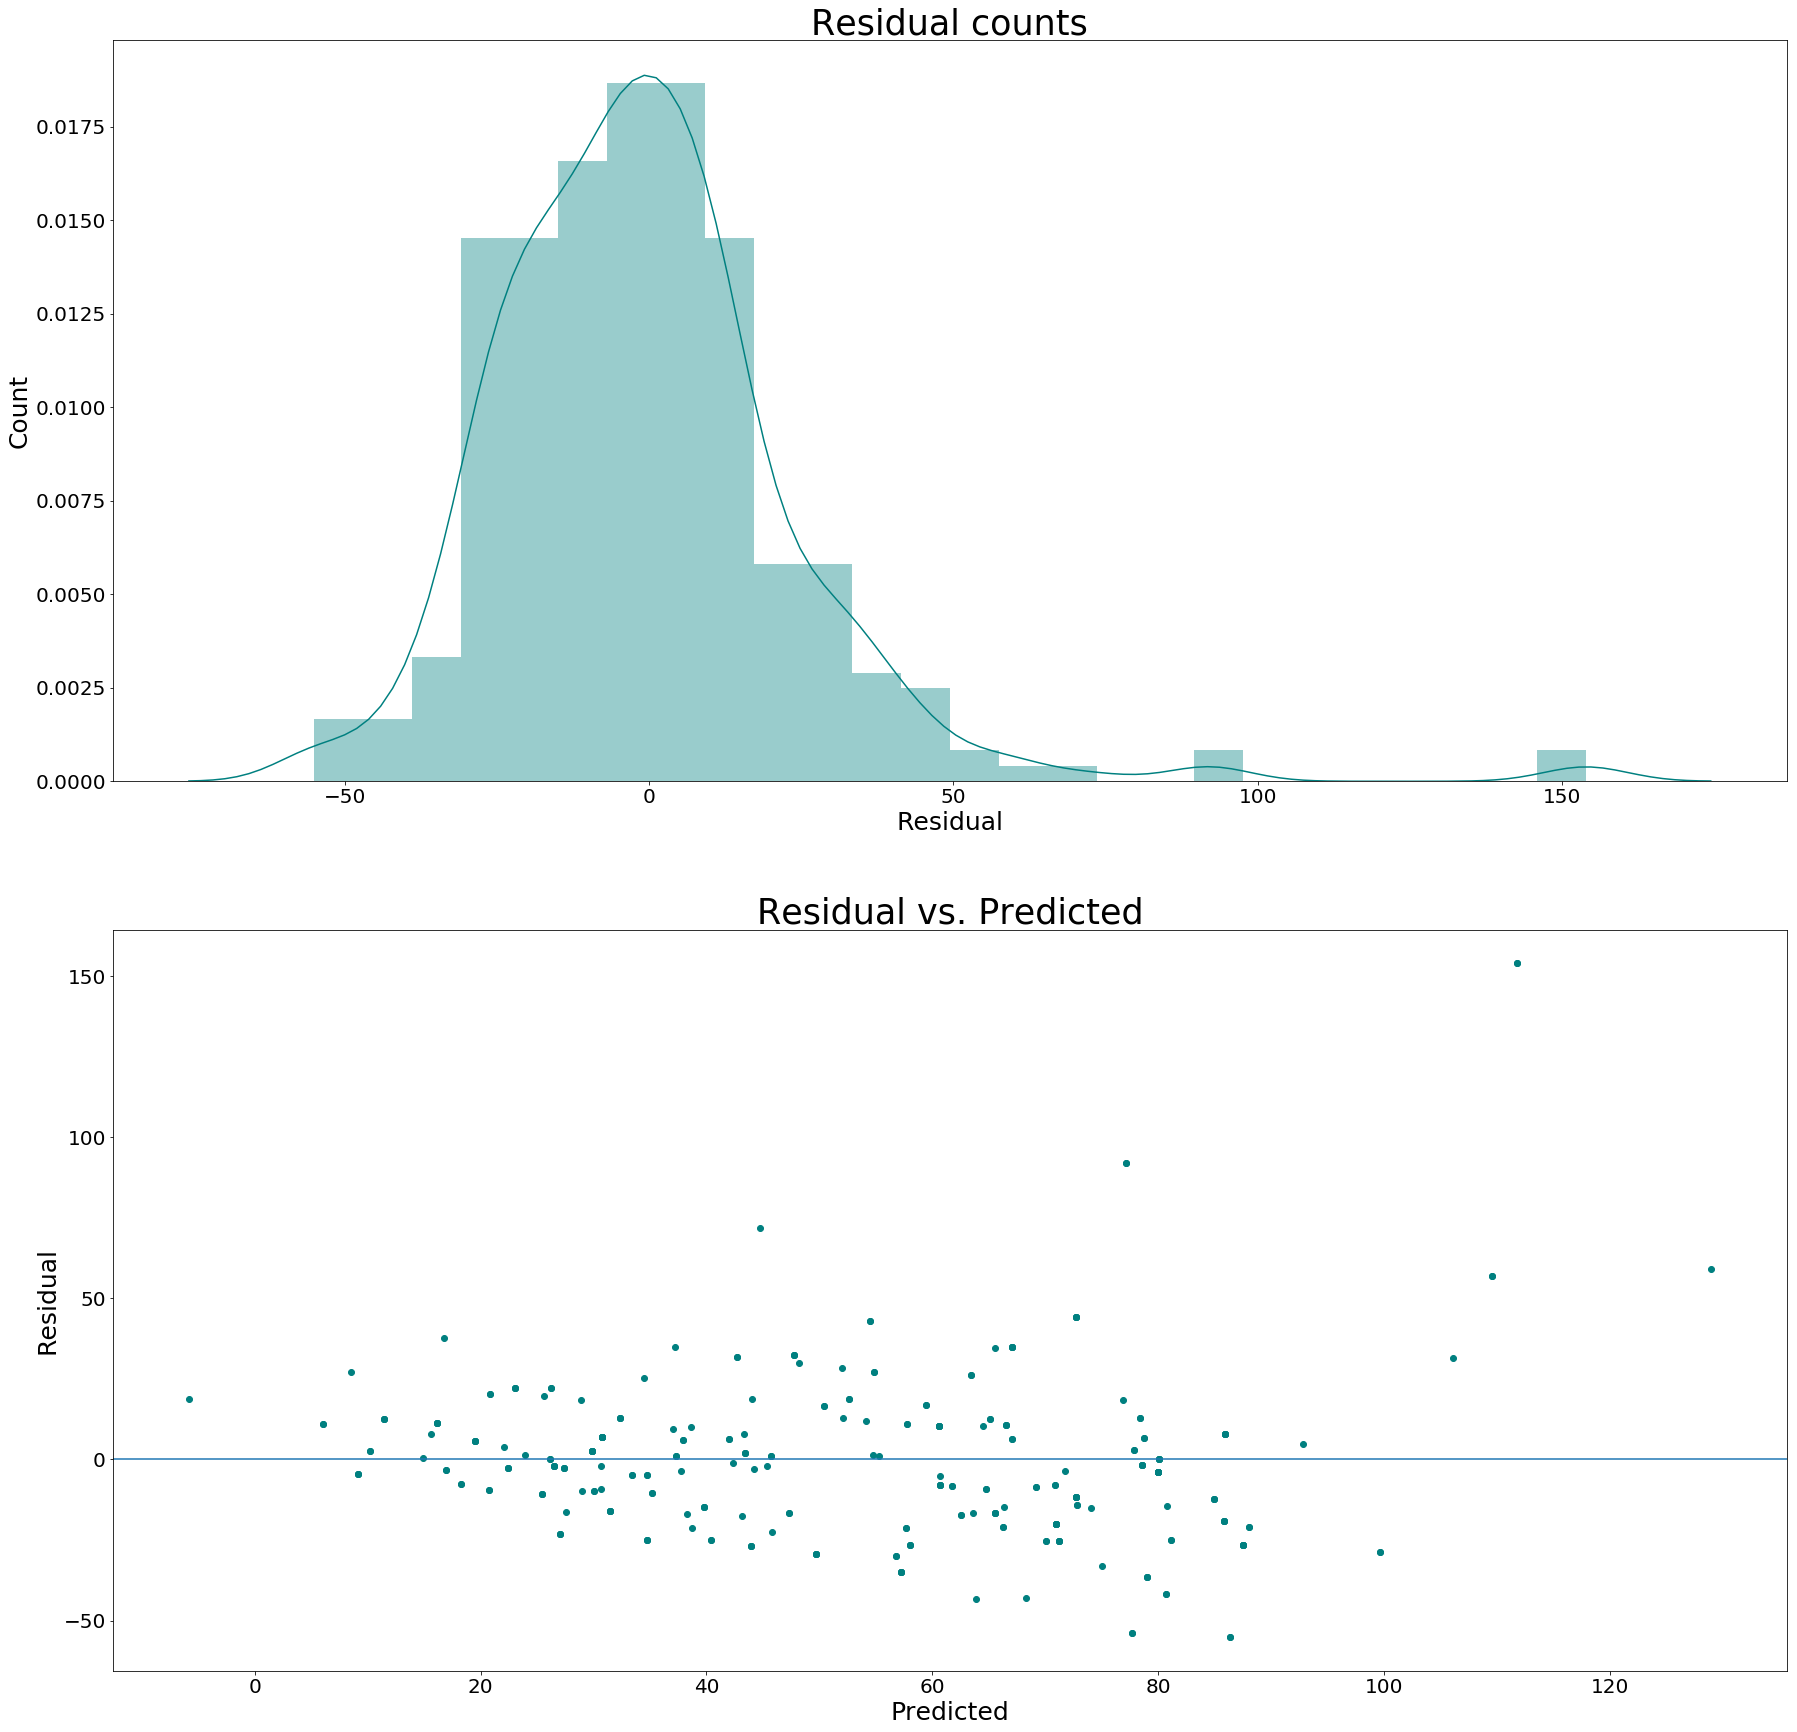

RMSE:
25.48862326634119


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
predicted=so2_linear_est.predict(X_train)
residual = np.asarray(y_train) - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, so2_linear_est.predict(X_train)))
print('RMSE:')
print(rmse)

In [20]:
lm = sklearn.linear_model.LinearRegression()
X=df_train[['car.count','wind.velocity','wind.direction','time.of.day','day.index']]
X['temperature']=df_train['temperature.1']/2+df_train['temperature.30']/2
X=X.astype(float)
y=df_train[['so2']]
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = ((y-predictions)**2).sum()/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE[0]*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: name 'stats' is not defined